In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import variation
import matplotlib.pyplot as plt

In [2]:
vowel_variation=pd.DataFrame(index=["time","F1","F2","F3","F4","F5"])
for j in range(1,8):  #number of vowelin each variation
    DATA_PATH_v="./Vowel_Data/Formant/Formant"+str(j)+"/"     
    i=0
    for speechfile in os.listdir(DATA_PATH_v):  #accessing each formant file
        data_v = pd.read_csv(DATA_PATH_v+speechfile, delim_whitespace=True,header=None,names=["time","F1","F2","F3","F4","F5"],dtype=np.float64,na_values="--undefined--")
        if i==0:
            cov_v=variation(data_v,axis=0)  #row to row variation
            i=1;
        else:
            cov_v=np.vstack((cov_v,variation(data_v,axis=0)))
    
    mean_variation_v=cov_v.mean(axis=0)  #row to row mean...mean for all F1, mean for all F2...
    
    vowel_variation['Vowel_'+str(j)]=mean_variation_v

vowel_variation=vowel_variation.drop('time') #discarding the variation of time
vowel_variation.to_csv('./New_without_CNN/vowel_variation.csv')

In [3]:
vowel_variation

,Vowel_1,Vowel_2,Vowel_3,Vowel_4,Vowel_5,Vowel_6,Vowel_7
F1,0.295937,0.344272,0.328788,0.475630,0.422971,0.334010,0.391462
F2,0.182272,0.089591,0.257506,0.216749,0.312302,0.206333,0.493862
F3,0.106357,0.085319,0.067017,0.155808,0.107689,0.065887,0.131223
F4,0.066786,0.060162,0.053644,0.067256,0.082889,0.045066,0.062165
F5,0.060304,0.059932,0.066884,0.071855,0.087400,0.064652,0.070095


In [7]:
vowel_avg=vowel_variation.mean(axis=1)
vowel_std=vowel_variation.std(axis=1)

In [9]:
word_variation=pd.DataFrame(index=["time","F1","F2","F3","F4","F5"])
for j in range(1,8):  #number of word in each variation
    DATA_PATH_w="./Word_Data/Formant/Formant"+str(j)+"/"     
    i=0
    for speechfile in os.listdir(DATA_PATH_w):  #accessing each formant file
        data_w = pd.read_csv(DATA_PATH_w+speechfile, delim_whitespace=True,header=None,names=["time","F1","F2","F3","F4","F5"],dtype=np.float64,na_values="--undefined--")
        if i==0:
            cov_w=variation(data_w,axis=0)  #row to row variation
            i=1;
        else:
            cov_w=np.vstack((cov_w,variation(data_w,axis=0)))
    
    mean_variation_w=cov_w.mean(axis=0)  #row to row mean...mean for all F1, mean for all F2...
    
    word_variation['Word_'+str(j)]=mean_variation_w

word_variation=word_variation.drop('time') #discarding the variation of time
word_variation.to_csv('./New_without_CNN/word_variation.csv')

In [10]:
word_variation

,Word_1,Word_2,Word_3,Word_4,Word_5,Word_6,Word_7
F1,0.462314,0.606578,0.700415,0.682885,0.984875,0.909860,0.533428
F2,0.307305,0.350328,0.495451,0.361486,0.266084,0.392629,0.415728
F3,0.163289,0.208669,0.181265,0.193615,0.133536,0.191591,0.175380
F4,0.100387,0.122586,0.102689,0.126628,0.084721,0.113282,0.119744
F5,0.086880,0.105005,0.096928,0.092619,0.071036,0.094012,0.093210


In [73]:
word_avg=word_variation.mean(axis=1)
word_std=word_variation.std(axis=1)

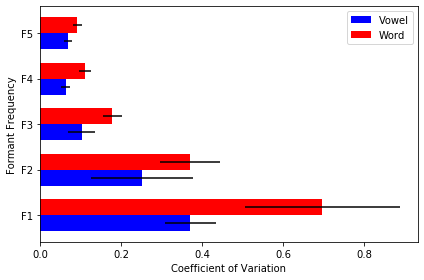

In [92]:
fig,ax=plt.subplots()
width=0.35
ind=np.arange(5)
bar_1=ax.barh(ind, vowel_avg,width,color='b',xerr=vowel_std)
bar_2=ax.barh(ind+width, word_avg,width,color='r',xerr=word_std)

ax.set_ylabel('Formant Frequency')
ax.set_xlabel('Coefficient of Variation')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(("F1","F2","F3","F4","F5"))
ax.legend((bar_1[0], bar_2[0]), ('Vowel', 'Word'))
plt.tight_layout()
plt.savefig('./New_without_CNN/COV_comparison.pdf',format='pdf',dpi=600)

In [11]:
# average variation for each vowel_words
per_vowel_avg=vowel_variation.mean(axis=0)
per_vowel_std=vowel_variation.std(axis=0)
per_word_avg=word_variation.mean(axis=0)
per_word_std=word_variation.std(axis=0)

In [12]:
print(per_vowel_avg)
print(per_vowel_std)

Vowel_1    0.142331
Vowel_2    0.127855
Vowel_3    0.154768
Vowel_4    0.197460
Vowel_5    0.202650
Vowel_6    0.143189
Vowel_7    0.229761
dtype: float64
Vowel_1    0.098640
Vowel_2    0.121763
Vowel_3    0.128926
Vowel_4    0.167493
Vowel_5    0.155891
Vowel_6    0.124671
Vowel_7    0.199492
dtype: float64


In [14]:
print(per_word_avg)
print(per_word_std)

Word_1    0.224035
Word_2    0.278633
Word_3    0.315350
Word_4    0.291447
Word_5    0.308051
Word_6    0.340275
Word_7    0.267498
dtype: float64
Word_1    0.159296
Word_2    0.207413
Word_3    0.270011
Word_4    0.242073
Word_5    0.386122
Word_6    0.339649
Word_7    0.195821
dtype: float64
